# Import Libraries



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Generate Dataset

In [2]:
a = 2.0
b = 3.0
n = 100

# x = np.linspace(0, 10, n)
# noise = np.random.normal(0, 2, n)
# y = a * x + b + noise

# # generate a sample DataFrame
# data = { 'x': x,  'y': y }

# df = pd.DataFrame(data)

# # write to Excel file
# df.to_excel('data-set.xlsx', index=False)

# # plot
# plt.scatter(x, y, label='Data Points', color='blue')

# plt.xlabel('X')
# plt.ylabel('Y')

# plt.legend()
# plt.show()



# Read From Excel file

In [2]:
# Read the Excel file into a DataFrame
df = pd.read_excel('data-set.xlsx')
x=df.x
y=df.y

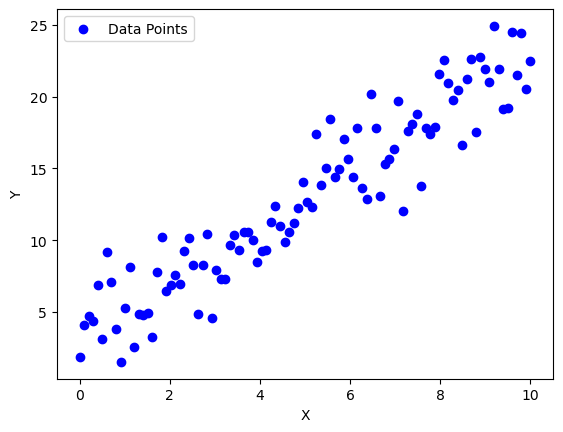

In [3]:
plt.scatter(x, y, label='Data Points', color='blue')
plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()

# Initializa Parameters

In [5]:
w_init = np.random.rand(1)
b_init = np.random.rand(1)

default_learning_rate = 0.001
epochs = 100000

# generate all random-indexes

In [39]:

random_indexes = np.random.randint(0,len(x),epochs)
# for i in random_indexes:
#     print(i)

In [45]:
def SGD(w,b,learning_rate):
    for epoch in range(epochs):

        random_index = random_indexes[epoch]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = w * x_i + b
        error = (y_i - y_pred)
        
        dw =  error * -1 * x_i
        db =  error * -1 * 1

        w = w - learning_rate * dw
        b = b - learning_rate * db
    return w,b

w_SGD,b_SGD = SGD(w_init,b_init,default_learning_rate)

print("SGD Trained weight:", w_SGD)
print("SGD Trained bias:", b_SGD)



SGD Trained weight: [1.9465887]
SGD Trained bias: [2.98970753]


In [24]:
def Momentum(w,b,learning_rate):
    vw = 0
    vb = 0
    beta = 0.9
    for epoch in range(epochs):

        random_index = random_indexes[epoch]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = w * x_i + b
        error = (y_i - y_pred)

        dw =  error * -1 * x_i
        db =  error * -1 * 1
        
        vw = beta * vw + (1 - beta) * dw 
        vb = beta * vb + (1 - beta) * db 

        w = w - learning_rate * vw 
        b = b - learning_rate * vb

    return w,b

w_Momentum,b_Momentum = Momentum(w_init,b_init,default_learning_rate)
print("Momentum Trained weight:", w_Momentum)
print("Momentum Trained bias:", b_Momentum)

Momentum Trained weight: [1.95650892]
Momentum Trained bias: [2.98951715]


In [25]:
def Nesterov(w,b,learning_rate):
    vw = 0
    vb = 0
    beta = 0.9
    for epoch in range(epochs):

        random_index = random_indexes[epoch]

        x_i = x[random_index]
        y_i = y[random_index]
        
        wstar = w - learning_rate * vw
        
        # Forward propagation with projected weight
        y_pred = wstar * x_i + b
        error = (y_i - y_pred)

        dwstar =  error * -1 * x_i
        dbstar =  error * -1 * 1        
        
        vw = beta * vw + (1-beta) * dwstar      
        vb = beta * vb + (1 - beta) * dbstar
        
        w = w - learning_rate * vw        
        b = b - learning_rate * vb
    return w,b

w_Nesterov,b_Nesterov = Nesterov(w_init,b_init,default_learning_rate)
print("Nesterov Trained weight:", w_Nesterov)
print("Nesterov Trained bias:", b_Nesterov)

Nesterov Trained weight: [1.95709973]
Nesterov Trained bias: [2.98960663]


In [26]:
def AdaGrad(w,b,learning_rate):
    sw = 0
    sb = 0
    epsilon = 0.0000001
    for epoch in range(epochs):
        random_index = random_indexes[epoch]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = w * x_i + b
        error = (y_i - y_pred)
        
        dw =  error * -1 * x_i
        db =  error * -1 * 1
        
        sw = sw + dw ** 2
        sb = sb + db ** 2

        w = w - (learning_rate / math.sqrt(sw+epsilon))* dw
        b = b - (learning_rate / math.sqrt(sb+epsilon)) * db
    return w,b

# adagrad_learning_rate = 0.01
# w_AdaGrad,b_AdaGrad = AdaGrad(w_init,b_init,adagrad_learning_rate)
w_AdaGrad,b_AdaGrad = AdaGrad(w_init,b_init,default_learning_rate)

print("AdaGrad Trained weight:", w_AdaGrad)
print("AdaGrad Trained bias:", b_AdaGrad)

AdaGrad Trained weight: [0.81076402]
AdaGrad Trained bias: [1.37845531]


In [27]:
def RMSprop(w,b,learning_rate):
    sw = 0
    sb = 0
    epsilon = 0.000001
    beta = 0.9
    for epoch in range(epochs):
        random_index = random_indexes[epoch]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = w * x_i + b
        error = (y_i - y_pred)
        
        dw =  error * -1 * x_i
        db =  error * -1 * 1
        
        sw = beta * sw +(1-beta) * (dw ** 2)
        sb = beta * sb +(1-beta) * (db ** 2)

        w = w - (learning_rate / math.sqrt(sw+epsilon))* dw
        b = b - (learning_rate / math.sqrt(sb+epsilon)) * db
    return w,b

w_RMSprop,b_RMSprop = RMSprop(w_init,b_init,default_learning_rate)
print("RMSprop Trained weight:", w_RMSprop)
print("RMSprop Trained bias:", b_RMSprop)

RMSprop Trained weight: [1.97206532]
RMSprop Trained bias: [2.94100951]


In [28]:
def Adadelta(w,b):
    sw = 0
    sb = 0
    
    Dw_current = 0
    Db_current = 0
    
    Dw_past = 0
    Db_past = 0
    
    wpast = 0
    bpast = 0
    
    epsilon = 0.000001
    beta = 0.95
    for epoch in range(epochs):
        random_index = random_indexes[epoch]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = w * x_i + b
        error = (y_i - y_pred)
        
        dw =  error * -1 * x_i
        db =  error * -1 * 1
        
        sw = beta * sw +(1-beta) * (dw ** 2)
        sb = beta * sb +(1-beta) * (db ** 2)
        
        wpast = w
        bpast = b 
            
        if(epoch == 0):
            w = w - (math.sqrt(epsilon) / math.sqrt(sw+epsilon))* dw
            b = b - (math.sqrt(epsilon) / math.sqrt(sb+epsilon)) * db
        else:
            delta_w = w - wpast
            delta_b = b - bpast
                     
            w = w - (math.sqrt(Dw_past+epsilon) / math.sqrt(sw+epsilon))* dw
            b = b - (math.sqrt(Db_past + epsilon) / math.sqrt(sb+epsilon)) * db
            
            Dw_current = beta * Dw_past + (1 - beta) * (delta_w)**2
            Db_current = beta * Db_past + (1 - beta) * (delta_b)**2
              
        Dw_past = Dw_current
        Db_past = Db_current
    return w,b

w_Adadelta,b_Adadelta = Adadelta(w_init,b_init)
print("Adadelta Trained weight:", w_Adadelta)
print("Adadelta Trained bias:", b_Adadelta)

Adadelta Trained weight: [1.97000027]
Adadelta Trained bias: [2.95637521]


In [29]:
def Adam(w,b,learning_rate):
    sw = 0
    sb = 0
    
    vw = 0
    vb = 0
    
    vw_hat = 0
    vb_hat = 0
    
    sw_hat = 0
    sb_hat = 0
    
    epsilon = 0.00000001
    beta1 = 0.9
    beta2 = 0.999
    for epoch in range(1,epochs+1):
        random_index = random_indexes[epoch-1]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = w * x_i + b
        error = (y_i - y_pred)
        
        dw =  error * -1 * x_i
        db =  error * -1 * 1
        
        
        vw = beta1 * vw + (1 - beta1) * dw 
        vb = beta1 * vb + (1 - beta1) * db 
        
        vw_hat = vw/(1-beta1**epoch)
        vb_hat = vb/(1-beta1**epoch)
        
        
        sw = beta2 * sw +(1-beta2) * (dw ** 2)
        sb = beta2 * sb +(1-beta2) * (db ** 2)
        
        sw_hat = sw/(1-beta2**epoch)
        sb_hat = sb/(1-beta2**epoch)
                
        w = w - (learning_rate / (math.sqrt(sw_hat)+epsilon))* vw_hat
        b = b - (learning_rate / (math.sqrt(sb_hat)+epsilon)) * vb_hat
    return w,b

w_Adam,b_Adam = Adam(w_init,b_init,default_learning_rate)
print("Adam Trained weight:", w_Adam)
print("Adam Trained bias:", b_Adam)

Adam Trained weight: [1.96470562]
Adam Trained bias: [2.98360188]


In [30]:
def AdaMax(w,b,learning_rate):
    sw = 0
    sb = 0
    
    vw = 0
    vb = 0
    
    vw_hat = 0
    vb_hat = 0
    
    sw_hat = 0
    sb_hat = 0
    
    beta1 = 0.9
    beta2 = 0.999
    for epoch in range(1,epochs+1):
        random_index = random_indexes[epoch-1]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = w * x_i + b
        error = (y_i - y_pred)
        
        dw =  error * -1 * x_i
        db =  error * -1 * 1
        
        vw = beta1 * vw + (1 - beta1) * dw 
        vb = beta1 * vb + (1 - beta1) * db 
        
        vw_hat = vw/(1-beta1**epoch)
        vb_hat = vb/(1-beta1**epoch)
        
        sw = max(beta2 * sw, abs(dw))
        sb = max(beta2 * sb, abs(db))
        
        sw_hat = sw/(1-beta2)
        sb_hat = sb/(1-beta2)
                
        w = w - (learning_rate / sw) * vw_hat
        b = b - (learning_rate / sb) * vb_hat
    return w,b

w_AdaMax,b_AdaMax = AdaMax(w_init,b_init,default_learning_rate)
print("AdaMax Trained weight:", w_AdaMax)
print("AdaMax Trained bias:", b_AdaMax)

AdaMax Trained weight: [1.97369099]
AdaMax Trained bias: [2.97588656]


In [31]:
def Nadam(w,b,learning_rate):
    sw = 0
    sb = 0
    
    vw = 0
    vb = 0
    
    vw_hat = 0
    vb_hat = 0
    
    sw_hat = 0
    sb_hat = 0
    
    epsilon = 0.0000001
    beta1 = 0.9
    beta2 = 0.999
    for epoch in range(1,epochs+1): 
        random_index = random_indexes[epoch-1]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = w * x_i + b
        error = (y_i - y_pred)
        
        dw =  error * -1 * x_i
        db =  error * -1 * 1
        
        vw = beta1 * vw + (1 - beta1) * dw 
        vb = beta1 * vb + (1 - beta1) * db 
        
        vw_hat = vw/(1-beta1**epoch)
        vb_hat = vb/(1-beta1**epoch)
        
        sw = beta2 * sw +(1-beta2) * (dw ** 2)
        sb = beta2 * sb +(1-beta2) * (db ** 2)
        
        sw_hat = sw/(1-beta2**epoch)
        sb_hat = sb/(1-beta2**epoch)
                
        w = w - (learning_rate / (math.sqrt(sw_hat)+epsilon))* (beta1*vw_hat+((1-beta1)/(1-beta1**epoch))*dw)
        b = b - (learning_rate / (math.sqrt(sb_hat)+epsilon)) * (beta1*vb_hat+((1-beta1)/(1-beta1**epoch))*db)
    return w,b

w_Nadam,b_Nadam = Nadam(w_init,b_init,default_learning_rate)
print("Nadam Trained weight:", w_Nadam)
print("Nadam Trained bias:", b_Nadam)

Nadam Trained weight: [1.9646014]
Nadam Trained bias: [2.98356609]


In [32]:
def AMSGrad(w,b,learning_rate):
    sw = 0
    sb = 0
    
    vw = 0
    vb = 0
    
    vw_hat = 0
    vb_hat = 0
    
    sw_hat = 0
    sb_hat = 0
    
    epsilon = 0.0000001
    beta1 = 0.9
    beta2 = 0.999
    for epoch in range(1,epochs+1):
        random_index = random_indexes[epoch-1]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = w * x_i + b
        error = (y_i - y_pred)
        
        dw =  error * -1 * x_i
        db =  error * -1 * 1
        
        vw = beta1 * vw + (1 - beta1) * dw 
        vb = beta1 * vb + (1 - beta1) * db        
    
        sw = beta2 * sw +(1-beta2) * (dw ** 2)
        sb = beta2 * sb +(1-beta2) * (db ** 2)
        
        sw_hat = max(sw,sw_hat)
        sb_hat = max(sb,sb_hat)
                
        w = w - (learning_rate / (math.sqrt(sw_hat)+epsilon))* vw
        b = b - (learning_rate / (math.sqrt(sb_hat)+epsilon)) * vb
    return w,b

w_AMSGrad,b_AMSGrad = AMSGrad(w_init,b_init,default_learning_rate)
print("AMSGrad Trained weight:", w_AMSGrad)
print("AMSGrad Trained bias:", b_AMSGrad)

AMSGrad Trained weight: [1.97402878]
AMSGrad Trained bias: [2.97964319]


In [33]:
def CalculateMSE(x,y,w,b):
    sigma_error = 0
    for i in range(len(x)):
        x_i = x[i]
        y_i = y[i]
        y_pred = w * x_i + b
        error = (y_i - y_pred)
        sigma_error +=error**2

    MSE = sigma_error/n
    return MSE

SGD_MSE = CalculateMSE(x,y,w_SGD,b_SGD)
Momentum_MSE = CalculateMSE(x,y,w_Momentum,b_Momentum)
Nesterov_MSE =  CalculateMSE(x,y,w_Nesterov,b_Nesterov)
AdaGrad_MSE =   CalculateMSE(x,y,w_AdaGrad,b_AdaGrad)
RMSprop_MSE =   CalculateMSE(x,y,w_RMSprop,b_RMSprop)
Adadelta_MSE =   CalculateMSE(x,y,w_Adadelta,b_Adadelta)
Adam_MSE =  CalculateMSE(x,y,w_Adam,b_Adam)
AdaMax_MSE =   CalculateMSE(x,y,w_AdaMax,b_AdaMax)
Nadam_MSE =   CalculateMSE(x,y,w_Nadam,b_Nadam)
AMSGrad_MSE = CalculateMSE(x,y,w_AMSGrad,b_AMSGrad)

print('SGD_MSE: ',SGD_MSE)
print('Momentum_MSE: ',Momentum_MSE)
print('Nesterov_MSE: ',Nesterov_MSE)
print('AdaGrad_MSE: ',AdaGrad_MSE)
print('RMSprop_MSE: ',RMSprop_MSE)
print('Adadelta_MSE: ',Adadelta_MSE)
print('Adam_MSE: ', Adam_MSE)
print('AdaMax_MSE: ', AdaMax_MSE)
print('Nadam_MSE: ', Nadam_MSE)
print('AMSGrad_MSE: ', AMSGrad_MSE)


SGD_MSE:  [4.34354127]
Momentum_MSE:  [4.31812965]
Nesterov_MSE:  [4.31678979]
AdaGrad_MSE:  [72.45643004]
RMSprop_MSE:  [4.30254452]
Adadelta_MSE:  [4.30180948]
Adam_MSE:  [4.30357849]
AdaMax_MSE:  [4.29200015]
Nadam_MSE:  [4.30377055]
AMSGrad_MSE:  [4.29089775]


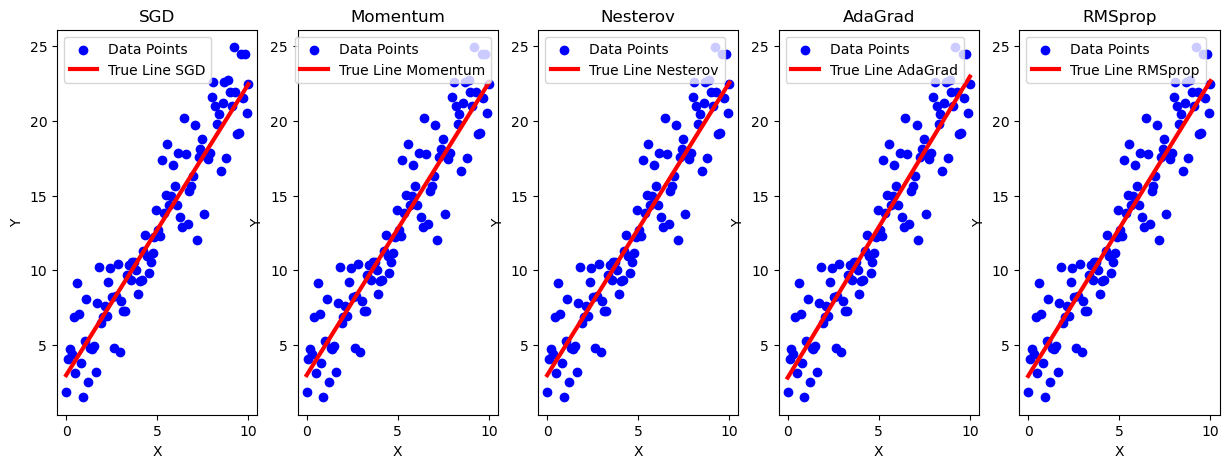

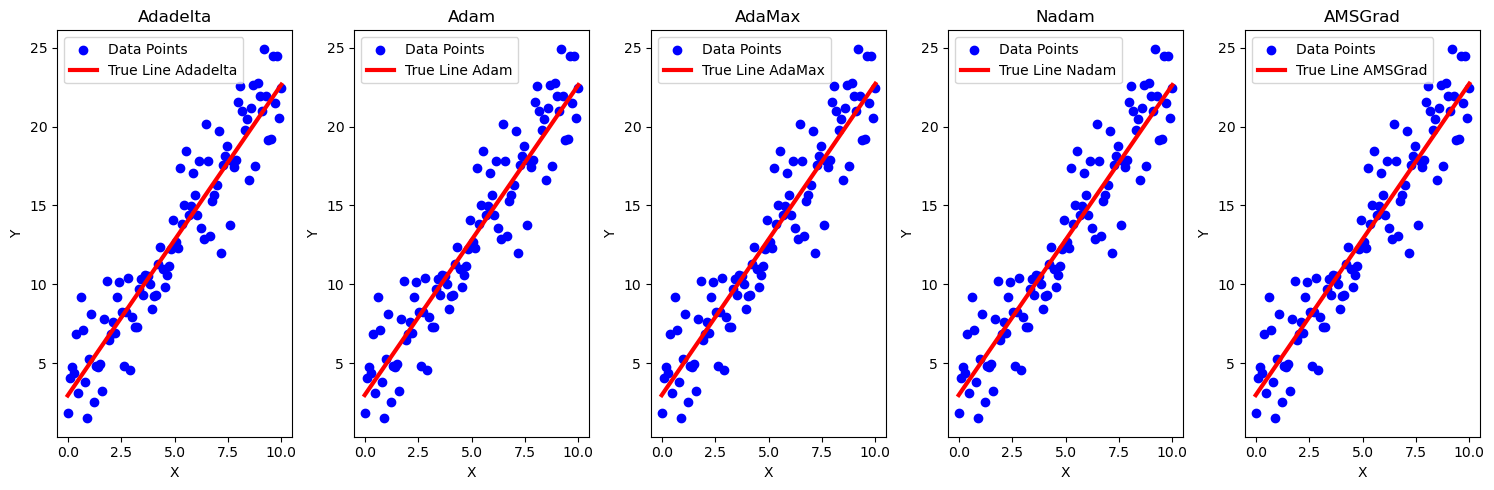

In [21]:
fig, axes_up = plt.subplots(1, 5, figsize=(15, 5))
axes_up[0].scatter(x, y, label='Data Points', color='blue') 
axes_up[0].plot(x, w_SGD * x + b_SGD, label=f'True Line SGD', color='red', linestyle='-', linewidth=3)
axes_up[0].set_xlabel('X')
axes_up[0].set_ylabel('Y')
axes_up[0].set_title('SGD')
axes_up[0].legend()

axes_up[1].scatter(x, y, label='Data Points', color='blue') 
axes_up[1].plot(x, w_Momentum * x + b_Momentum, label=f'True Line Momentum', color='red', linestyle='-', linewidth=3)
axes_up[1].set_xlabel('X')
axes_up[1].set_ylabel('Y')
axes_up[1].set_title('Momentum')
axes_up[1].legend()

axes_up[2].scatter(x, y, label='Data Points', color='blue') 
axes_up[2].plot(x, w_Nesterov * x + b_Nesterov, label=f'True Line Nesterov', color='red', linestyle='-', linewidth=3)
axes_up[2].set_xlabel('X')
axes_up[2].set_ylabel('Y')
axes_up[2].set_title('Nesterov')
axes_up[2].legend()

axes_up[3].scatter(x, y, label='Data Points', color='blue') 
axes_up[3].plot(x, w_AdaGrad * x + b_AdaGrad, label=f'True Line AdaGrad', color='red', linestyle='-', linewidth=3)
axes_up[3].set_xlabel('X')
axes_up[3].set_ylabel('Y')
axes_up[3].set_title('AdaGrad')
axes_up[3].legend()

axes_up[4].scatter(x, y, label='Data Points', color='blue') 
axes_up[4].plot(x, w_RMSprop * x + b_RMSprop, label=f'True Line RMSprop', color='red', linestyle='-', linewidth=3)
axes_up[4].set_xlabel('X')
axes_up[4].set_ylabel('Y')
axes_up[4].set_title('RMSprop')
axes_up[4].legend()


fig, axes_down = plt.subplots(1, 5, figsize=(15, 5))
axes_down[0].scatter(x, y, label='Data Points', color='blue') 
axes_down[0].plot(x, w_Adadelta * x + b_Adadelta, label=f'True Line Adadelta', color='red', linestyle='-', linewidth=3)
axes_down[0].set_xlabel('X')
axes_down[0].set_ylabel('Y')
axes_down[0].set_title('Adadelta')
axes_down[0].legend()

axes_down[1].scatter(x, y, label='Data Points', color='blue') 
axes_down[1].plot(x, w_Adam * x + b_Adam, label=f'True Line Adam', color='red', linestyle='-', linewidth=3)
axes_down[1].set_xlabel('X')
axes_down[1].set_ylabel('Y')
axes_down[1].set_title('Adam')
axes_down[1].legend()

axes_down[2].scatter(x, y, label='Data Points', color='blue') 
axes_down[2].plot(x, w_AdaMax * x + b_AdaMax , label=f'True Line AdaMax', color='red', linestyle='-', linewidth=3)
axes_down[2].set_xlabel('X')
axes_down[2].set_ylabel('Y')
axes_down[2].set_title('AdaMax')
axes_down[2].legend()

axes_down[3].scatter(x, y, label='Data Points', color='blue') 
axes_down[3].plot(x, w_Nadam * x  + b_Nadam , label=f'True Line Nadam', color='red', linestyle='-', linewidth=3)
axes_down[3].set_xlabel('X')
axes_down[3].set_ylabel('Y')
axes_down[3].set_title('Nadam')
axes_down[3].legend()

axes_down[4].scatter(x, y, label='Data Points', color='blue') 
axes_down[4].plot(x, w_AMSGrad * x  + b_AMSGrad , label=f'True Line AMSGrad', color='red', linestyle='-', linewidth=3)
axes_down[4].set_xlabel('X')
axes_down[4].set_ylabel('Y')
axes_down[4].set_title('AMSGrad')
axes_down[4].legend()

plt.tight_layout()
plt.show()
